In [2]:
import matplotlib.pyplot as plt
import numpy as np
import csv

In [3]:
timestamps_exp =[]
with open("timestamps_exp_large.csv", "r", newline='') as f:
    reader = csv.reader(f)
    for row in reader:
        timestamps_exp.append(np.array(row, dtype=np.float64))

In [4]:
len(timestamps_exp)

3000

In [5]:
simul_hawkes =[[] for k in range(100)]

In [6]:
for i in range(100):
    for j in range(30):
        simul_hawkes[i].append(timestamps_exp[j*100 +i])

In [7]:
len(simul_hawkes[0])

30

In [8]:
import paramhawkes as ph

In [23]:
test = ph.HawkesProcess(simul_hawkes[0])
test.set_kernel_shape()
params=np.array([10 , 40 , 0.6 , 10])

In [9]:
dg_bis = np.array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 ])

In [20]:
dg_ter = np.linspace(0.75, 0.85, 101)

In [21]:
dg_ter

array([0.75 , 0.751, 0.752, 0.753, 0.754, 0.755, 0.756, 0.757, 0.758,
       0.759, 0.76 , 0.761, 0.762, 0.763, 0.764, 0.765, 0.766, 0.767,
       0.768, 0.769, 0.77 , 0.771, 0.772, 0.773, 0.774, 0.775, 0.776,
       0.777, 0.778, 0.779, 0.78 , 0.781, 0.782, 0.783, 0.784, 0.785,
       0.786, 0.787, 0.788, 0.789, 0.79 , 0.791, 0.792, 0.793, 0.794,
       0.795, 0.796, 0.797, 0.798, 0.799, 0.8  , 0.801, 0.802, 0.803,
       0.804, 0.805, 0.806, 0.807, 0.808, 0.809, 0.81 , 0.811, 0.812,
       0.813, 0.814, 0.815, 0.816, 0.817, 0.818, 0.819, 0.82 , 0.821,
       0.822, 0.823, 0.824, 0.825, 0.826, 0.827, 0.828, 0.829, 0.83 ,
       0.831, 0.832, 0.833, 0.834, 0.835, 0.836, 0.837, 0.838, 0.839,
       0.84 , 0.841, 0.842, 0.843, 0.844, 0.845, 0.846, 0.847, 0.848,
       0.849, 0.85 ])


100%|██████████| 101/101 [06:04<00:00,  3.60s/it]


[ 5.02889393 50.61782039 77.86006996 94.14569328]


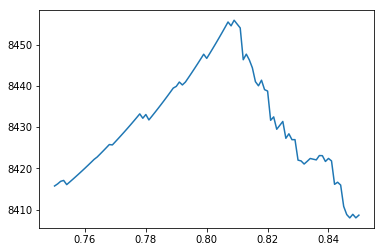

array([ 5.02889393, 50.61782039, 77.86006996, 94.14569328])

In [29]:
test.mle_delta(params,delta_grid = dg_ter, graphic_option=True)

In [30]:
test.deltahat

0.8089999999999999

In [11]:
from tqdm import tqdm

In [31]:
result_simu = []
for i in tqdm(range(100)):
    obs_i = ph.HawkesProcess(simul_hawkes[i])
    obs_i.set_kernel_shape()
    obs_i.mle_delta(params,delta_grid = dg_ter, graphic_option=False)
    result_simu.append(30*(obs_i.deltahat - 0.8))


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  1%|          | 1/101 [00:03<05:05,  3.05s/it]

  2%|▏         | 2/101 [00:07<05:47,  3.51s/it]

  3%|▎         | 3/101 [00:10<05:34,  3.41s/it]

  4%|▍         | 4/101 [00:12<05:15,  3.25s/it]

  5%|▍         | 5/101 [00:16<05:09,  3.22s/it]

  6%|▌         | 6/101 [00:20<05:27,  3.45s/it]

  7%|▋         | 7/101 [00:24<05:34,  3.56s/it]

  8%|▊         | 8/101 [00:28<05:29,  3.54s/it]

  9%|▉         | 9/101 [00:31<05:26,  3.55s/it]

 10%|▉         | 10/101 [00:35<05:23,  3.56s/it]

 11%|█         | 11/101 [00:38<05:18,  3.54s/it]

 12%|█▏        | 12/101 [00:42<05:17,  3.57s/it]

 13%|█▎        | 13/101 [00:45<05:11,  3.54s/it]

 14%|█▍        | 14/101 [00:49<05:08,  3.55s/it]

 15%|█▍        | 15/101 [00:53<05:05,  3.55s/it]

 16%|█▌        | 16/101 [00:56<05:00,  3.54s/it]

 17%|█▋        | 17/101 [01:00<04:56,  3.53s/it]

 18%|█▊        | 18/101 [01:02<04:50,  3.49s/it]

 19%|█▉        | 19/101 [0

 18%|█▊        | 18/101 [00:40<03:04,  2.23s/it]

 19%|█▉        | 19/101 [00:42<03:02,  2.23s/it]

 20%|█▉        | 20/101 [00:44<02:59,  2.22s/it]

 21%|██        | 21/101 [00:46<02:57,  2.22s/it]

 22%|██▏       | 22/101 [00:48<02:55,  2.22s/it]

 23%|██▎       | 23/101 [00:51<02:53,  2.22s/it]

 24%|██▍       | 24/101 [00:53<02:51,  2.23s/it]

 25%|██▍       | 25/101 [00:55<02:49,  2.24s/it]

 26%|██▌       | 26/101 [00:58<02:48,  2.24s/it]

 27%|██▋       | 27/101 [01:00<02:46,  2.25s/it]

 28%|██▊       | 28/101 [01:02<02:44,  2.25s/it]

 29%|██▊       | 29/101 [01:04<02:41,  2.24s/it]

 30%|██▉       | 30/101 [01:07<02:38,  2.23s/it]

 31%|███       | 31/101 [01:09<02:36,  2.23s/it]

 32%|███▏      | 32/101 [01:11<02:34,  2.24s/it]

 33%|███▎      | 33/101 [01:13<02:31,  2.23s/it]

 34%|███▎      | 34/101 [01:15<02:29,  2.23s/it]

 35%|███▍      | 35/101 [01:17<02:26,  2.22s/it]

 36%|███▌      | 36/101 [01:19<02:23,  2.21s/it]

 37%|███▋      | 37/101 [01:21<02:21,  2.21s/it]



 37%|███▋      | 37/101 [02:09<03:44,  3.51s/it]

 38%|███▊      | 38/101 [02:12<03:40,  3.50s/it]

 39%|███▊      | 39/101 [02:16<03:36,  3.49s/it]

 40%|███▉      | 40/101 [02:19<03:33,  3.49s/it]

 41%|████      | 41/101 [02:23<03:29,  3.49s/it]

 42%|████▏     | 42/101 [02:26<03:25,  3.49s/it]

 43%|████▎     | 43/101 [02:30<03:22,  3.50s/it]

 44%|████▎     | 44/101 [02:33<03:18,  3.49s/it]

 45%|████▍     | 45/101 [02:36<03:15,  3.48s/it]

 46%|████▌     | 46/101 [02:40<03:12,  3.49s/it]

 47%|████▋     | 47/101 [02:43<03:08,  3.48s/it]

 48%|████▊     | 48/101 [02:46<03:04,  3.48s/it]

 49%|████▊     | 49/101 [02:52<03:03,  3.52s/it]

 50%|████▉     | 50/101 [02:55<02:59,  3.52s/it]

 50%|█████     | 51/101 [02:58<02:55,  3.51s/it]

 51%|█████▏    | 52/101 [03:02<02:51,  3.50s/it]

 52%|█████▏    | 53/101 [03:06<02:48,  3.51s/it]

 53%|█████▎    | 54/101 [03:09<02:45,  3.52s/it]

 54%|█████▍    | 55/101 [03:13<02:42,  3.52s/it]

 55%|█████▌    | 56/101 [03:16<02:38,  3.52s/it]



 55%|█████▌    | 56/101 [02:36<02:05,  2.80s/it]

 56%|█████▋    | 57/101 [02:40<02:04,  2.82s/it]

 57%|█████▋    | 58/101 [02:43<02:01,  2.81s/it]

 58%|█████▊    | 59/101 [02:45<01:57,  2.81s/it]

 59%|█████▉    | 60/101 [02:48<01:55,  2.81s/it]

 60%|██████    | 61/101 [02:51<01:52,  2.81s/it]

 61%|██████▏   | 62/101 [02:54<01:49,  2.81s/it]

 62%|██████▏   | 63/101 [02:56<01:46,  2.80s/it]

 63%|██████▎   | 64/101 [02:59<01:43,  2.80s/it]

 64%|██████▍   | 65/101 [03:01<01:40,  2.80s/it]

 65%|██████▌   | 66/101 [03:04<01:38,  2.80s/it]

 66%|██████▋   | 67/101 [03:07<01:35,  2.80s/it]

 67%|██████▋   | 68/101 [03:09<01:32,  2.79s/it]

 68%|██████▊   | 69/101 [03:12<01:29,  2.78s/it]

 69%|██████▉   | 70/101 [03:14<01:26,  2.78s/it]

 70%|███████   | 71/101 [03:16<01:23,  2.77s/it]

 71%|███████▏  | 72/101 [03:19<01:20,  2.78s/it]

 72%|███████▏  | 73/101 [03:22<01:17,  2.77s/it]

 73%|███████▎  | 74/101 [03:24<01:14,  2.76s/it]

 74%|███████▍  | 75/101 [03:26<01:11,  2.76s/it]



 74%|███████▍  | 75/101 [03:26<01:11,  2.76s/it]

 75%|███████▌  | 76/101 [03:29<01:09,  2.76s/it]

 76%|███████▌  | 77/101 [03:32<01:06,  2.76s/it]

 77%|███████▋  | 78/101 [03:35<01:03,  2.76s/it]

 78%|███████▊  | 79/101 [03:38<01:00,  2.76s/it]

 79%|███████▉  | 80/101 [03:41<00:58,  2.77s/it]

 80%|████████  | 81/101 [03:43<00:55,  2.76s/it]

 81%|████████  | 82/101 [03:46<00:52,  2.76s/it]

 82%|████████▏ | 83/101 [03:49<00:49,  2.76s/it]

 83%|████████▎ | 84/101 [03:51<00:46,  2.76s/it]

 84%|████████▍ | 85/101 [03:54<00:44,  2.76s/it]

 85%|████████▌ | 86/101 [03:57<00:41,  2.77s/it]

 86%|████████▌ | 87/101 [04:00<00:38,  2.77s/it]

 87%|████████▋ | 88/101 [04:02<00:35,  2.76s/it]

 88%|████████▊ | 89/101 [04:06<00:33,  2.77s/it]

 89%|████████▉ | 90/101 [04:09<00:30,  2.77s/it]

 90%|█████████ | 91/101 [04:12<00:27,  2.78s/it]

 91%|█████████ | 92/101 [04:15<00:24,  2.78s/it]

 92%|█████████▏| 93/101 [04:17<00:22,  2.77s/it]

 93%|█████████▎| 94/101 [04:20<00:19,  2.77s/it]



 93%|█████████▎| 94/101 [05:31<00:24,  3.53s/it]

 94%|█████████▍| 95/101 [05:34<00:21,  3.52s/it]

 95%|█████████▌| 96/101 [05:37<00:17,  3.52s/it]

 96%|█████████▌| 97/101 [05:41<00:14,  3.52s/it]

 97%|█████████▋| 98/101 [05:44<00:10,  3.51s/it]

 98%|█████████▊| 99/101 [05:47<00:07,  3.51s/it]

 99%|█████████▉| 100/101 [05:50<00:03,  3.51s/it]

100%|██████████| 101/101 [05:54<00:00,  3.51s/it]


 16%|█▌        | 16/100 [1:22:24<7:12:39, 309.04s/it]

  0%|          | 0/101 [00:00<?, ?it/s]

  1%|          | 1/101 [00:04<06:49,  4.09s/it]

  2%|▏         | 2/101 [00:07<06:22,  3.86s/it]

  3%|▎         | 3/101 [00:11<06:00,  3.68s/it]

  4%|▍         | 4/101 [00:14<05:55,  3.66s/it]

  5%|▍         | 5/101 [00:18<05:47,  3.62s/it]

  6%|▌         | 6/101 [00:21<05:47,  3.66s/it]

  7%|▋         | 7/101 [00:25<05:38,  3.60s/it]

  8%|▊         | 8/101 [00:28<05:35,  3.60s/it]

  9%|▉         | 9/101 [00:32<05:34,  3.63s/it]

 10%|▉         | 10/101 [00:36<05:33,  3.67s/it]

 11%|█    

 10%|▉         | 10/101 [00:33<05:05,  3.36s/it]

 11%|█         | 11/101 [00:37<05:08,  3.43s/it]

 12%|█▏        | 12/101 [00:40<05:01,  3.39s/it]

 13%|█▎        | 13/101 [00:43<04:53,  3.34s/it]

 14%|█▍        | 14/101 [00:46<04:49,  3.33s/it]

 15%|█▍        | 15/101 [00:49<04:45,  3.32s/it]

 16%|█▌        | 16/101 [00:52<04:40,  3.30s/it]

 17%|█▋        | 17/101 [00:55<04:36,  3.29s/it]

 18%|█▊        | 18/101 [00:58<04:31,  3.27s/it]

 19%|█▉        | 19/101 [01:01<04:26,  3.25s/it]

 20%|█▉        | 20/101 [01:04<04:21,  3.23s/it]

 21%|██        | 21/101 [01:07<04:17,  3.22s/it]

 22%|██▏       | 22/101 [01:10<04:13,  3.21s/it]

 23%|██▎       | 23/101 [01:13<04:10,  3.22s/it]

 24%|██▍       | 24/101 [01:17<04:07,  3.22s/it]

 25%|██▍       | 25/101 [01:20<04:04,  3.22s/it]

 26%|██▌       | 26/101 [01:23<04:02,  3.23s/it]

 27%|██▋       | 27/101 [01:27<03:58,  3.23s/it]

 28%|██▊       | 28/101 [01:30<03:55,  3.22s/it]

 29%|██▊       | 29/101 [01:33<03:52,  3.23s/it]



 29%|██▊       | 29/101 [02:02<05:05,  4.24s/it]

 30%|██▉       | 30/101 [02:06<04:58,  4.20s/it]

 31%|███       | 31/101 [02:09<04:52,  4.18s/it]

 32%|███▏      | 32/101 [02:13<04:47,  4.16s/it]

 33%|███▎      | 33/101 [02:17<04:42,  4.15s/it]

 34%|███▎      | 34/101 [02:20<04:36,  4.13s/it]

 35%|███▍      | 35/101 [02:24<04:32,  4.13s/it]

 36%|███▌      | 36/101 [02:28<04:27,  4.12s/it]

 37%|███▋      | 37/101 [02:31<04:22,  4.10s/it]

 38%|███▊      | 38/101 [02:35<04:17,  4.09s/it]

 39%|███▊      | 39/101 [02:38<04:12,  4.07s/it]

 40%|███▉      | 40/101 [02:43<04:08,  4.08s/it]

 41%|████      | 41/101 [02:46<04:03,  4.06s/it]

 42%|████▏     | 42/101 [02:50<03:58,  4.05s/it]

 43%|████▎     | 43/101 [02:54<03:54,  4.05s/it]

 44%|████▎     | 44/101 [02:58<03:50,  4.05s/it]

 45%|████▍     | 45/101 [03:02<03:47,  4.05s/it]

 46%|████▌     | 46/101 [03:06<03:42,  4.05s/it]

 47%|████▋     | 47/101 [03:10<03:38,  4.04s/it]

 48%|████▊     | 48/101 [03:14<03:34,  4.04s/it]



 48%|████▊     | 48/101 [02:49<03:06,  3.53s/it]

 49%|████▊     | 49/101 [02:52<03:03,  3.53s/it]

 50%|████▉     | 50/101 [02:56<03:00,  3.54s/it]

 50%|█████     | 51/101 [03:00<02:57,  3.54s/it]

 51%|█████▏    | 52/101 [03:03<02:53,  3.54s/it]

 52%|█████▏    | 53/101 [03:07<02:49,  3.54s/it]

 53%|█████▎    | 54/101 [03:11<02:46,  3.54s/it]

 54%|█████▍    | 55/101 [03:14<02:42,  3.54s/it]

 55%|█████▌    | 56/101 [03:18<02:39,  3.54s/it]

 56%|█████▋    | 57/101 [03:22<02:35,  3.55s/it]

 57%|█████▋    | 58/101 [03:25<02:32,  3.54s/it]

 58%|█████▊    | 59/101 [03:29<02:29,  3.55s/it]

 59%|█████▉    | 60/101 [03:33<02:25,  3.55s/it]

 60%|██████    | 61/101 [03:36<02:21,  3.54s/it]

 61%|██████▏   | 62/101 [03:39<02:18,  3.54s/it]

 62%|██████▏   | 63/101 [03:43<02:14,  3.54s/it]

 63%|██████▎   | 64/101 [03:46<02:11,  3.54s/it]

 64%|██████▍   | 65/101 [03:49<02:07,  3.54s/it]

 65%|██████▌   | 66/101 [03:52<02:03,  3.53s/it]

 66%|██████▋   | 67/101 [03:56<02:00,  3.53s/it]



 66%|██████▋   | 67/101 [04:17<02:10,  3.84s/it]

 67%|██████▋   | 68/101 [04:21<02:06,  3.84s/it]

 68%|██████▊   | 69/101 [04:24<02:02,  3.84s/it]

 69%|██████▉   | 70/101 [04:28<01:58,  3.83s/it]

 70%|███████   | 71/101 [04:30<01:54,  3.82s/it]

 71%|███████▏  | 72/101 [04:34<01:50,  3.81s/it]

 72%|███████▏  | 73/101 [04:37<01:46,  3.80s/it]

 73%|███████▎  | 74/101 [04:40<01:42,  3.80s/it]

 74%|███████▍  | 75/101 [04:44<01:38,  3.79s/it]

 75%|███████▌  | 76/101 [04:47<01:34,  3.78s/it]

 76%|███████▌  | 77/101 [04:50<01:30,  3.78s/it]

 77%|███████▋  | 78/101 [04:54<01:26,  3.78s/it]

 78%|███████▊  | 79/101 [04:58<01:23,  3.77s/it]

 79%|███████▉  | 80/101 [05:01<01:19,  3.77s/it]

 80%|████████  | 81/101 [05:05<01:15,  3.77s/it]

 81%|████████  | 82/101 [05:09<01:11,  3.77s/it]

 82%|████████▏ | 83/101 [05:13<01:07,  3.78s/it]

 83%|████████▎ | 84/101 [05:17<01:04,  3.78s/it]

 84%|████████▍ | 85/101 [05:20<01:00,  3.78s/it]

 85%|████████▌ | 86/101 [05:25<00:56,  3.78s/it]



 85%|████████▌ | 86/101 [03:30<00:36,  2.45s/it]

 86%|████████▌ | 87/101 [03:33<00:34,  2.45s/it]

 87%|████████▋ | 88/101 [03:36<00:31,  2.46s/it]

 88%|████████▊ | 89/101 [03:39<00:29,  2.46s/it]

 89%|████████▉ | 90/101 [03:41<00:27,  2.46s/it]

 90%|█████████ | 91/101 [03:44<00:24,  2.46s/it]

 91%|█████████ | 92/101 [03:46<00:22,  2.47s/it]

 92%|█████████▏| 93/101 [03:49<00:19,  2.47s/it]

 93%|█████████▎| 94/101 [03:51<00:17,  2.47s/it]

 94%|█████████▍| 95/101 [03:54<00:14,  2.47s/it]

 95%|█████████▌| 96/101 [03:57<00:12,  2.47s/it]

 96%|█████████▌| 97/101 [04:00<00:09,  2.47s/it]

 97%|█████████▋| 98/101 [04:02<00:07,  2.48s/it]

 98%|█████████▊| 99/101 [04:05<00:04,  2.48s/it]

 99%|█████████▉| 100/101 [04:07<00:02,  2.48s/it]

100%|██████████| 101/101 [04:10<00:00,  2.48s/it]


 32%|███▏      | 32/100 [2:54:59<6:11:51, 328.11s/it]

  0%|          | 0/101 [00:00<?, ?it/s]

  1%|          | 1/101 [00:02<04:50,  2.91s/it]

  2%|▏         | 2/101 [00:05<04:28,  2.71s/it]

  3

  2%|▏         | 2/101 [00:06<05:22,  3.26s/it]

  3%|▎         | 3/101 [00:09<05:14,  3.21s/it]

  4%|▍         | 4/101 [00:12<05:13,  3.23s/it]

  5%|▍         | 5/101 [00:16<05:13,  3.26s/it]

  6%|▌         | 6/101 [00:19<05:09,  3.25s/it]

  7%|▋         | 7/101 [00:22<05:08,  3.28s/it]

  8%|▊         | 8/101 [00:26<05:04,  3.28s/it]

  9%|▉         | 9/101 [00:29<05:04,  3.31s/it]

 10%|▉         | 10/101 [00:32<04:58,  3.28s/it]

 11%|█         | 11/101 [00:36<04:55,  3.28s/it]

 12%|█▏        | 12/101 [00:39<04:53,  3.30s/it]

 13%|█▎        | 13/101 [00:43<04:52,  3.33s/it]

 14%|█▍        | 14/101 [00:46<04:50,  3.34s/it]

 15%|█▍        | 15/101 [00:49<04:46,  3.33s/it]

 16%|█▌        | 16/101 [00:53<04:43,  3.34s/it]

 17%|█▋        | 17/101 [00:56<04:40,  3.33s/it]

 18%|█▊        | 18/101 [01:00<04:37,  3.34s/it]

 19%|█▉        | 19/101 [01:03<04:34,  3.34s/it]

 20%|█▉        | 20/101 [01:06<04:30,  3.33s/it]

 21%|██        | 21/101 [01:09<04:26,  3.33s/it]

 22%|██▏

 21%|██        | 21/101 [00:56<03:35,  2.70s/it]

 22%|██▏       | 22/101 [00:59<03:32,  2.69s/it]

 23%|██▎       | 23/101 [01:01<03:29,  2.69s/it]

 24%|██▍       | 24/101 [01:04<03:26,  2.68s/it]

 25%|██▍       | 25/101 [01:06<03:23,  2.67s/it]

 26%|██▌       | 26/101 [01:09<03:19,  2.66s/it]

 27%|██▋       | 27/101 [01:11<03:16,  2.65s/it]

 28%|██▊       | 28/101 [01:14<03:13,  2.65s/it]

 29%|██▊       | 29/101 [01:16<03:10,  2.65s/it]

 30%|██▉       | 30/101 [01:19<03:07,  2.64s/it]

 31%|███       | 31/101 [01:21<03:04,  2.64s/it]

 32%|███▏      | 32/101 [01:23<03:01,  2.62s/it]

 33%|███▎      | 33/101 [01:26<02:57,  2.62s/it]

 34%|███▎      | 34/101 [01:28<02:54,  2.61s/it]

 35%|███▍      | 35/101 [01:30<02:51,  2.60s/it]

 36%|███▌      | 36/101 [01:33<02:49,  2.60s/it]

 37%|███▋      | 37/101 [01:37<02:48,  2.63s/it]

 38%|███▊      | 38/101 [01:39<02:45,  2.63s/it]

 39%|███▊      | 39/101 [01:42<02:42,  2.63s/it]

 40%|███▉      | 40/101 [01:45<02:40,  2.63s/it]



 40%|███▉      | 40/101 [01:44<02:39,  2.62s/it]

 41%|████      | 41/101 [01:47<02:37,  2.62s/it]

 42%|████▏     | 42/101 [01:49<02:34,  2.61s/it]

 43%|████▎     | 43/101 [01:52<02:31,  2.61s/it]

 44%|████▎     | 44/101 [01:54<02:28,  2.61s/it]

 45%|████▍     | 45/101 [01:57<02:26,  2.62s/it]

 46%|████▌     | 46/101 [02:00<02:23,  2.61s/it]

 47%|████▋     | 47/101 [02:02<02:20,  2.60s/it]

 48%|████▊     | 48/101 [02:04<02:17,  2.60s/it]

 49%|████▊     | 49/101 [02:06<02:14,  2.59s/it]

 50%|████▉     | 50/101 [02:09<02:12,  2.59s/it]

 50%|█████     | 51/101 [02:12<02:09,  2.59s/it]

 51%|█████▏    | 52/101 [02:14<02:06,  2.59s/it]

 52%|█████▏    | 53/101 [02:17<02:04,  2.59s/it]

 53%|█████▎    | 54/101 [02:19<02:01,  2.59s/it]

 54%|█████▍    | 55/101 [02:22<01:59,  2.60s/it]

 55%|█████▌    | 56/101 [02:25<01:56,  2.60s/it]

 56%|█████▋    | 57/101 [02:28<01:54,  2.60s/it]

 57%|█████▋    | 58/101 [02:30<01:51,  2.60s/it]

 58%|█████▊    | 59/101 [02:33<01:49,  2.61s/it]



 58%|█████▊    | 59/101 [03:25<02:26,  3.48s/it]

 59%|█████▉    | 60/101 [03:28<02:22,  3.48s/it]

 60%|██████    | 61/101 [03:32<02:19,  3.48s/it]

 61%|██████▏   | 62/101 [03:36<02:15,  3.48s/it]

 62%|██████▏   | 63/101 [03:39<02:12,  3.49s/it]

 63%|██████▎   | 64/101 [03:43<02:09,  3.49s/it]

 64%|██████▍   | 65/101 [03:46<02:05,  3.48s/it]

 65%|██████▌   | 66/101 [03:49<02:01,  3.47s/it]

 66%|██████▋   | 67/101 [03:52<01:57,  3.47s/it]

 67%|██████▋   | 68/101 [03:55<01:54,  3.46s/it]

 68%|██████▊   | 69/101 [03:58<01:50,  3.45s/it]

 69%|██████▉   | 70/101 [04:01<01:46,  3.45s/it]

 70%|███████   | 71/101 [04:04<01:43,  3.44s/it]

 71%|███████▏  | 72/101 [04:07<01:39,  3.43s/it]

 72%|███████▏  | 73/101 [04:10<01:36,  3.44s/it]

 73%|███████▎  | 74/101 [04:13<01:32,  3.43s/it]

 74%|███████▍  | 75/101 [04:16<01:28,  3.42s/it]

 75%|███████▌  | 76/101 [04:19<01:25,  3.41s/it]

 76%|███████▌  | 77/101 [04:22<01:21,  3.41s/it]

 77%|███████▋  | 78/101 [04:26<01:18,  3.42s/it]



 77%|███████▋  | 78/101 [03:32<01:02,  2.72s/it]

 78%|███████▊  | 79/101 [03:34<00:59,  2.72s/it]

 79%|███████▉  | 80/101 [03:38<00:57,  2.73s/it]

 80%|████████  | 81/101 [03:40<00:54,  2.73s/it]

 81%|████████  | 82/101 [03:43<00:51,  2.73s/it]

 82%|████████▏ | 83/101 [03:47<00:49,  2.74s/it]

 83%|████████▎ | 84/101 [03:49<00:46,  2.74s/it]

 84%|████████▍ | 85/101 [03:52<00:43,  2.73s/it]

 85%|████████▌ | 86/101 [03:55<00:41,  2.74s/it]

 86%|████████▌ | 87/101 [03:57<00:38,  2.73s/it]

 87%|████████▋ | 88/101 [03:59<00:35,  2.73s/it]

 88%|████████▊ | 89/101 [04:02<00:32,  2.72s/it]

 89%|████████▉ | 90/101 [04:04<00:29,  2.72s/it]

 90%|█████████ | 91/101 [04:07<00:27,  2.72s/it]

 91%|█████████ | 92/101 [04:10<00:24,  2.72s/it]

 92%|█████████▏| 93/101 [04:12<00:21,  2.72s/it]

 93%|█████████▎| 94/101 [04:15<00:19,  2.72s/it]

 94%|█████████▍| 95/101 [04:18<00:16,  2.72s/it]

 95%|█████████▌| 96/101 [04:21<00:13,  2.72s/it]

 96%|█████████▌| 97/101 [04:24<00:10,  2.72s/it]



 96%|█████████▌| 97/101 [05:02<00:12,  3.12s/it]

 97%|█████████▋| 98/101 [05:04<00:09,  3.11s/it]

 98%|█████████▊| 99/101 [05:07<00:06,  3.10s/it]

 99%|█████████▉| 100/101 [05:10<00:03,  3.10s/it]

100%|██████████| 101/101 [05:12<00:00,  3.09s/it]


 51%|█████     | 51/100 [4:32:08<4:21:28, 320.16s/it]

  0%|          | 0/101 [00:00<?, ?it/s]

  1%|          | 1/101 [00:02<04:48,  2.88s/it]

  2%|▏         | 2/101 [00:05<04:48,  2.92s/it]

  3%|▎         | 3/101 [00:08<04:52,  2.98s/it]

  4%|▍         | 4/101 [00:12<04:59,  3.09s/it]

  5%|▍         | 5/101 [00:15<05:04,  3.17s/it]

  6%|▌         | 6/101 [00:19<05:11,  3.28s/it]

  7%|▋         | 7/101 [00:22<05:06,  3.26s/it]

  8%|▊         | 8/101 [00:26<05:12,  3.36s/it]

  9%|▉         | 9/101 [00:30<05:13,  3.41s/it]

 10%|▉         | 10/101 [00:34<05:10,  3.42s/it]

 11%|█         | 11/101 [00:37<05:05,  3.40s/it]

 12%|█▏        | 12/101 [00:40<04:58,  3.35s/it]

 13%|█▎        | 13/101 [00:42<04:51,  3.31s/it]

 14%|█▍   

 13%|█▎        | 13/101 [00:36<04:05,  2.79s/it]

 14%|█▍        | 14/101 [00:39<04:02,  2.79s/it]

 15%|█▍        | 15/101 [00:41<03:59,  2.79s/it]

 16%|█▌        | 16/101 [00:44<03:56,  2.78s/it]

 17%|█▋        | 17/101 [00:47<03:54,  2.79s/it]

 18%|█▊        | 18/101 [00:50<03:51,  2.78s/it]

 19%|█▉        | 19/101 [00:52<03:48,  2.78s/it]

 20%|█▉        | 20/101 [00:55<03:46,  2.80s/it]

 21%|██        | 21/101 [00:58<03:43,  2.79s/it]

 22%|██▏       | 22/101 [01:01<03:40,  2.79s/it]

 23%|██▎       | 23/101 [01:03<03:36,  2.77s/it]

 24%|██▍       | 24/101 [01:06<03:33,  2.77s/it]

 25%|██▍       | 25/101 [01:09<03:29,  2.76s/it]

 26%|██▌       | 26/101 [01:11<03:27,  2.76s/it]

 27%|██▋       | 27/101 [01:14<03:23,  2.75s/it]

 28%|██▊       | 28/101 [01:16<03:20,  2.75s/it]

 29%|██▊       | 29/101 [01:19<03:18,  2.76s/it]

 30%|██▉       | 30/101 [01:22<03:15,  2.75s/it]

 31%|███       | 31/101 [01:24<03:11,  2.74s/it]

 32%|███▏      | 32/101 [01:27<03:09,  2.75s/it]



 32%|███▏      | 32/101 [01:41<03:38,  3.16s/it]

 33%|███▎      | 33/101 [01:44<03:35,  3.16s/it]

 34%|███▎      | 34/101 [01:47<03:31,  3.16s/it]

 35%|███▍      | 35/101 [01:50<03:28,  3.16s/it]

 36%|███▌      | 36/101 [01:53<03:25,  3.16s/it]

 37%|███▋      | 37/101 [01:57<03:23,  3.17s/it]

 38%|███▊      | 38/101 [02:00<03:19,  3.17s/it]

 39%|███▊      | 39/101 [02:03<03:16,  3.17s/it]

 40%|███▉      | 40/101 [02:06<03:13,  3.17s/it]

 41%|████      | 41/101 [02:10<03:10,  3.18s/it]

 42%|████▏     | 42/101 [02:13<03:07,  3.18s/it]

 43%|████▎     | 43/101 [02:16<03:04,  3.18s/it]

 44%|████▎     | 44/101 [02:19<03:01,  3.18s/it]

 45%|████▍     | 45/101 [02:23<02:57,  3.18s/it]

 46%|████▌     | 46/101 [02:26<02:54,  3.18s/it]

 47%|████▋     | 47/101 [02:29<02:52,  3.19s/it]

 48%|████▊     | 48/101 [02:32<02:48,  3.19s/it]

 49%|████▊     | 49/101 [02:36<02:45,  3.19s/it]

 50%|████▉     | 50/101 [02:39<02:42,  3.19s/it]

 50%|█████     | 51/101 [02:42<02:39,  3.18s/it]



 50%|█████     | 51/101 [02:25<02:22,  2.85s/it]

 51%|█████▏    | 52/101 [02:27<02:19,  2.84s/it]

 52%|█████▏    | 53/101 [02:30<02:16,  2.84s/it]

 53%|█████▎    | 54/101 [02:32<02:13,  2.83s/it]

 54%|█████▍    | 55/101 [02:35<02:10,  2.83s/it]

 55%|█████▌    | 56/101 [02:37<02:06,  2.82s/it]

 56%|█████▋    | 57/101 [02:40<02:03,  2.82s/it]

 57%|█████▋    | 58/101 [02:43<02:01,  2.82s/it]

 58%|█████▊    | 59/101 [02:46<01:58,  2.82s/it]

 59%|█████▉    | 60/101 [02:48<01:55,  2.82s/it]

 60%|██████    | 61/101 [02:51<01:52,  2.82s/it]

 61%|██████▏   | 62/101 [02:54<01:49,  2.81s/it]

 62%|██████▏   | 63/101 [02:57<01:46,  2.81s/it]

 63%|██████▎   | 64/101 [03:00<01:44,  2.82s/it]

 64%|██████▍   | 65/101 [03:02<01:41,  2.81s/it]

 65%|██████▌   | 66/101 [03:05<01:38,  2.81s/it]

 66%|██████▋   | 67/101 [03:07<01:35,  2.81s/it]

 67%|██████▋   | 68/101 [03:10<01:32,  2.80s/it]

 68%|██████▊   | 69/101 [03:13<01:29,  2.80s/it]

 69%|██████▉   | 70/101 [03:15<01:26,  2.80s/it]



 69%|██████▉   | 70/101 [03:32<01:34,  3.04s/it]

 70%|███████   | 71/101 [03:35<01:31,  3.04s/it]

 71%|███████▏  | 72/101 [03:39<01:28,  3.04s/it]

 72%|███████▏  | 73/101 [03:42<01:25,  3.05s/it]

 73%|███████▎  | 74/101 [03:46<01:22,  3.06s/it]

 74%|███████▍  | 75/101 [03:49<01:19,  3.06s/it]

 75%|███████▌  | 76/101 [03:52<01:16,  3.06s/it]

 76%|███████▌  | 77/101 [03:55<01:13,  3.06s/it]

 77%|███████▋  | 78/101 [03:58<01:10,  3.06s/it]

 78%|███████▊  | 79/101 [04:02<01:07,  3.07s/it]

 79%|███████▉  | 80/101 [04:05<01:04,  3.07s/it]

 80%|████████  | 81/101 [04:08<01:01,  3.07s/it]

 81%|████████  | 82/101 [04:12<00:58,  3.08s/it]

 82%|████████▏ | 83/101 [04:15<00:55,  3.08s/it]

 83%|████████▎ | 84/101 [04:19<00:52,  3.09s/it]

 84%|████████▍ | 85/101 [04:22<00:49,  3.09s/it]

 85%|████████▌ | 86/101 [04:26<00:46,  3.10s/it]

 86%|████████▌ | 87/101 [04:29<00:43,  3.10s/it]

 87%|████████▋ | 88/101 [04:32<00:40,  3.10s/it]

 88%|████████▊ | 89/101 [04:36<00:37,  3.10s/it]



 88%|████████▊ | 89/101 [04:15<00:34,  2.88s/it]

 89%|████████▉ | 90/101 [04:18<00:31,  2.87s/it]

 90%|█████████ | 91/101 [04:21<00:28,  2.87s/it]

 91%|█████████ | 92/101 [04:24<00:25,  2.87s/it]

 92%|█████████▏| 93/101 [04:27<00:22,  2.87s/it]

 93%|█████████▎| 94/101 [04:31<00:20,  2.89s/it]

 94%|█████████▍| 95/101 [04:37<00:17,  2.92s/it]

 95%|█████████▌| 96/101 [04:39<00:14,  2.92s/it]

 96%|█████████▌| 97/101 [04:42<00:11,  2.91s/it]

 97%|█████████▋| 98/101 [04:45<00:08,  2.91s/it]

 98%|█████████▊| 99/101 [04:48<00:05,  2.91s/it]

 99%|█████████▉| 100/101 [04:51<00:02,  2.91s/it]

100%|██████████| 101/101 [04:54<00:00,  2.91s/it]


 67%|██████▋   | 67/100 [5:54:04<2:54:23, 317.08s/it]

  0%|          | 0/101 [00:00<?, ?it/s]

  1%|          | 1/101 [00:04<07:56,  4.76s/it]

  2%|▏         | 2/101 [00:07<06:35,  4.00s/it]

  3%|▎         | 3/101 [00:11<06:00,  3.68s/it]

  4%|▍         | 4/101 [00:15<06:19,  3.92s/it]

  5%|▍         | 5/101 [00:18<05:57,  3.72s/it]

  6%|▌

  5%|▍         | 5/101 [00:16<05:09,  3.22s/it]

  6%|▌         | 6/101 [00:19<05:02,  3.18s/it]

  7%|▋         | 7/101 [00:22<04:59,  3.18s/it]

  8%|▊         | 8/101 [00:25<04:59,  3.22s/it]

  9%|▉         | 9/101 [00:28<04:55,  3.21s/it]

 10%|▉         | 10/101 [00:32<04:51,  3.20s/it]

 11%|█         | 11/101 [00:35<04:46,  3.19s/it]

 12%|█▏        | 12/101 [00:38<04:45,  3.21s/it]

 13%|█▎        | 13/101 [00:41<04:42,  3.21s/it]

 14%|█▍        | 14/101 [00:44<04:37,  3.19s/it]

 15%|█▍        | 15/101 [00:47<04:33,  3.18s/it]

 16%|█▌        | 16/101 [00:50<04:29,  3.17s/it]

 17%|█▋        | 17/101 [00:53<04:26,  3.17s/it]

 18%|█▊        | 18/101 [00:57<04:23,  3.17s/it]

 19%|█▉        | 19/101 [01:00<04:20,  3.18s/it]

 20%|█▉        | 20/101 [01:03<04:17,  3.18s/it]

 21%|██        | 21/101 [01:06<04:14,  3.18s/it]

 22%|██▏       | 22/101 [01:10<04:12,  3.19s/it]

 23%|██▎       | 23/101 [01:13<04:09,  3.20s/it]

 24%|██▍       | 24/101 [01:16<04:05,  3.19s/it]

 25%|

 24%|██▍       | 24/101 [00:54<02:54,  2.26s/it]

 25%|██▍       | 25/101 [00:56<02:51,  2.25s/it]

 26%|██▌       | 26/101 [00:58<02:49,  2.25s/it]

 27%|██▋       | 27/101 [01:00<02:46,  2.25s/it]

 28%|██▊       | 28/101 [01:03<02:44,  2.26s/it]

 29%|██▊       | 29/101 [01:05<02:41,  2.25s/it]

 30%|██▉       | 30/101 [01:07<02:39,  2.25s/it]

 31%|███       | 31/101 [01:09<02:37,  2.25s/it]

 32%|███▏      | 32/101 [01:12<02:35,  2.25s/it]

 33%|███▎      | 33/101 [01:14<02:33,  2.26s/it]

 34%|███▎      | 34/101 [01:16<02:31,  2.26s/it]

 35%|███▍      | 35/101 [01:19<02:29,  2.26s/it]

 36%|███▌      | 36/101 [01:21<02:26,  2.25s/it]

 37%|███▋      | 37/101 [01:23<02:24,  2.25s/it]

 38%|███▊      | 38/101 [01:25<02:22,  2.26s/it]

 39%|███▊      | 39/101 [01:27<02:19,  2.25s/it]

 40%|███▉      | 40/101 [01:29<02:17,  2.25s/it]

 41%|████      | 41/101 [01:31<02:14,  2.24s/it]

 42%|████▏     | 42/101 [01:33<02:11,  2.23s/it]

 43%|████▎     | 43/101 [01:35<02:09,  2.23s/it]



 43%|████▎     | 43/101 [02:04<02:47,  2.89s/it]

 44%|████▎     | 44/101 [02:06<02:44,  2.88s/it]

 45%|████▍     | 45/101 [02:08<02:40,  2.87s/it]

 46%|████▌     | 46/101 [02:11<02:36,  2.85s/it]

 47%|████▋     | 47/101 [02:13<02:33,  2.84s/it]

 48%|████▊     | 48/101 [02:16<02:30,  2.85s/it]

 49%|████▊     | 49/101 [02:19<02:28,  2.85s/it]

 50%|████▉     | 50/101 [02:22<02:25,  2.85s/it]

 50%|█████     | 51/101 [02:25<02:22,  2.85s/it]

 51%|█████▏    | 52/101 [02:27<02:19,  2.84s/it]

 52%|█████▏    | 53/101 [02:30<02:16,  2.84s/it]

 53%|█████▎    | 54/101 [02:33<02:13,  2.84s/it]

 54%|█████▍    | 55/101 [02:36<02:10,  2.84s/it]

 55%|█████▌    | 56/101 [02:38<02:07,  2.83s/it]

 56%|█████▋    | 57/101 [02:41<02:04,  2.83s/it]

 57%|█████▋    | 58/101 [02:43<02:01,  2.82s/it]

 58%|█████▊    | 59/101 [02:46<01:58,  2.82s/it]

 59%|█████▉    | 60/101 [02:49<01:55,  2.82s/it]

 60%|██████    | 61/101 [02:52<01:52,  2.82s/it]

 61%|██████▏   | 62/101 [02:54<01:49,  2.82s/it]



 61%|██████▏   | 62/101 [02:37<01:38,  2.54s/it]

 62%|██████▏   | 63/101 [02:40<01:36,  2.54s/it]

 63%|██████▎   | 64/101 [02:43<01:34,  2.55s/it]

 64%|██████▍   | 65/101 [02:45<01:31,  2.55s/it]

 65%|██████▌   | 66/101 [02:48<01:29,  2.55s/it]

 66%|██████▋   | 67/101 [02:51<01:26,  2.56s/it]

 67%|██████▋   | 68/101 [02:53<01:24,  2.56s/it]

 68%|██████▊   | 69/101 [02:57<01:22,  2.57s/it]

 69%|██████▉   | 70/101 [02:59<01:19,  2.57s/it]

 70%|███████   | 71/101 [03:02<01:17,  2.57s/it]

 71%|███████▏  | 72/101 [03:05<01:14,  2.57s/it]

 72%|███████▏  | 73/101 [03:09<01:12,  2.59s/it]

 73%|███████▎  | 74/101 [03:12<01:10,  2.60s/it]

 74%|███████▍  | 75/101 [03:14<01:07,  2.60s/it]

 75%|███████▌  | 76/101 [03:18<01:05,  2.61s/it]

 76%|███████▌  | 77/101 [03:20<01:02,  2.61s/it]

 77%|███████▋  | 78/101 [03:23<01:00,  2.61s/it]

 78%|███████▊  | 79/101 [03:26<00:57,  2.62s/it]

 79%|███████▉  | 80/101 [03:29<00:55,  2.62s/it]

 80%|████████  | 81/101 [03:32<00:52,  2.62s/it]



 80%|████████  | 81/101 [03:09<00:46,  2.34s/it]

 81%|████████  | 82/101 [03:11<00:44,  2.34s/it]

 82%|████████▏ | 83/101 [03:14<00:42,  2.34s/it]

 83%|████████▎ | 84/101 [03:16<00:39,  2.34s/it]

 84%|████████▍ | 85/101 [03:19<00:37,  2.34s/it]

 85%|████████▌ | 86/101 [03:21<00:35,  2.35s/it]

 86%|████████▌ | 87/101 [03:24<00:32,  2.35s/it]

 87%|████████▋ | 88/101 [03:26<00:30,  2.35s/it]

 88%|████████▊ | 89/101 [03:29<00:28,  2.35s/it]

 89%|████████▉ | 90/101 [03:31<00:25,  2.35s/it]

 90%|█████████ | 91/101 [03:34<00:23,  2.35s/it]

 91%|█████████ | 92/101 [03:36<00:21,  2.36s/it]

 92%|█████████▏| 93/101 [03:39<00:18,  2.36s/it]

 93%|█████████▎| 94/101 [03:41<00:16,  2.36s/it]

 94%|█████████▍| 95/101 [03:44<00:14,  2.36s/it]

 95%|█████████▌| 96/101 [03:46<00:11,  2.36s/it]

 96%|█████████▌| 97/101 [03:48<00:09,  2.36s/it]

 97%|█████████▋| 98/101 [03:50<00:07,  2.35s/it]

 98%|█████████▊| 99/101 [03:52<00:04,  2.35s/it]

 99%|█████████▉| 100/101 [03:54<00:02,  2.35s/it]


 99%|█████████▉| 100/101 [04:13<00:02,  2.53s/it]

100%|██████████| 101/101 [04:15<00:00,  2.53s/it]


 86%|████████▌ | 86/100 [7:25:05<1:12:27, 310.53s/it]

  0%|          | 0/101 [00:00<?, ?it/s]

  1%|          | 1/101 [00:02<04:43,  2.83s/it]

  2%|▏         | 2/101 [00:05<04:29,  2.72s/it]

  3%|▎         | 3/101 [00:07<04:18,  2.63s/it]

  4%|▍         | 4/101 [00:10<04:23,  2.72s/it]

  5%|▍         | 5/101 [00:13<04:26,  2.78s/it]

  6%|▌         | 6/101 [00:16<04:24,  2.79s/it]

  7%|▋         | 7/101 [00:20<04:29,  2.87s/it]

  8%|▊         | 8/101 [00:22<04:25,  2.85s/it]

  9%|▉         | 9/101 [00:25<04:23,  2.86s/it]

 10%|▉         | 10/101 [00:28<04:19,  2.85s/it]

 11%|█         | 11/101 [00:31<04:14,  2.83s/it]

 12%|█▏        | 12/101 [00:33<04:09,  2.81s/it]

 13%|█▎        | 13/101 [00:36<04:08,  2.83s/it]

 14%|█▍        | 14/101 [00:39<04:04,  2.81s/it]

 15%|█▍        | 15/101 [00:41<04:00,  2.79s/it]

 16%|█▌        | 16/101 [00:44<03:57,  2.79s/it]

 17%|█▋   

 16%|█▌        | 16/101 [00:41<03:42,  2.62s/it]

 17%|█▋        | 17/101 [00:44<03:40,  2.62s/it]

 18%|█▊        | 18/101 [00:47<03:38,  2.63s/it]

 19%|█▉        | 19/101 [00:50<03:36,  2.64s/it]

 20%|█▉        | 20/101 [00:52<03:33,  2.63s/it]

 21%|██        | 21/101 [00:55<03:30,  2.63s/it]

 22%|██▏       | 22/101 [00:57<03:28,  2.63s/it]

 23%|██▎       | 23/101 [01:00<03:25,  2.63s/it]

 24%|██▍       | 24/101 [01:03<03:23,  2.64s/it]

 25%|██▍       | 25/101 [01:06<03:20,  2.64s/it]

 26%|██▌       | 26/101 [01:08<03:17,  2.64s/it]

 27%|██▋       | 27/101 [01:11<03:15,  2.64s/it]

 28%|██▊       | 28/101 [01:13<03:12,  2.64s/it]

 29%|██▊       | 29/101 [01:16<03:09,  2.63s/it]

 30%|██▉       | 30/101 [01:19<03:07,  2.64s/it]

 31%|███       | 31/101 [01:21<03:05,  2.64s/it]

 32%|███▏      | 32/101 [01:24<03:02,  2.65s/it]

 33%|███▎      | 33/101 [01:27<03:00,  2.65s/it]

 34%|███▎      | 34/101 [01:30<02:57,  2.65s/it]

 35%|███▍      | 35/101 [01:32<02:55,  2.66s/it]



 35%|███▍      | 35/101 [02:15<04:16,  3.88s/it]

 36%|███▌      | 36/101 [02:19<04:11,  3.88s/it]

 37%|███▋      | 37/101 [02:23<04:08,  3.88s/it]

 38%|███▊      | 38/101 [02:27<04:04,  3.88s/it]

 39%|███▊      | 39/101 [02:31<04:00,  3.88s/it]

 40%|███▉      | 40/101 [02:35<03:56,  3.88s/it]

 41%|████      | 41/101 [02:39<03:52,  3.88s/it]

 42%|████▏     | 42/101 [02:42<03:48,  3.87s/it]

 43%|████▎     | 43/101 [02:46<03:44,  3.87s/it]

 44%|████▎     | 44/101 [02:50<03:40,  3.87s/it]

 45%|████▍     | 45/101 [02:54<03:36,  3.87s/it]

 46%|████▌     | 46/101 [02:58<03:32,  3.87s/it]

 47%|████▋     | 47/101 [03:02<03:29,  3.87s/it]

 48%|████▊     | 48/101 [03:05<03:25,  3.87s/it]

 49%|████▊     | 49/101 [03:09<03:20,  3.86s/it]

 50%|████▉     | 50/101 [03:13<03:17,  3.87s/it]

 50%|█████     | 51/101 [03:18<03:14,  3.88s/it]

 51%|█████▏    | 52/101 [03:21<03:10,  3.88s/it]

 52%|█████▏    | 53/101 [03:25<03:06,  3.88s/it]

 53%|█████▎    | 54/101 [03:29<03:02,  3.89s/it]



 53%|█████▎    | 54/101 [02:51<02:29,  3.17s/it]

 54%|█████▍    | 55/101 [02:54<02:25,  3.17s/it]

 55%|█████▌    | 56/101 [02:57<02:22,  3.17s/it]

 56%|█████▋    | 57/101 [03:00<02:19,  3.17s/it]

 57%|█████▋    | 58/101 [03:03<02:15,  3.16s/it]

 58%|█████▊    | 59/101 [03:06<02:12,  3.16s/it]

 59%|█████▉    | 60/101 [03:09<02:09,  3.15s/it]

 60%|██████    | 61/101 [03:11<02:05,  3.14s/it]

 61%|██████▏   | 62/101 [03:14<02:02,  3.14s/it]

 62%|██████▏   | 63/101 [03:18<01:59,  3.14s/it]

 63%|██████▎   | 64/101 [03:20<01:55,  3.13s/it]

 64%|██████▍   | 65/101 [03:23<01:52,  3.13s/it]

 65%|██████▌   | 66/101 [03:26<01:49,  3.13s/it]

 66%|██████▋   | 67/101 [03:29<01:46,  3.12s/it]

 67%|██████▋   | 68/101 [03:31<01:42,  3.11s/it]

 68%|██████▊   | 69/101 [03:34<01:39,  3.11s/it]

 69%|██████▉   | 70/101 [03:36<01:36,  3.10s/it]

 70%|███████   | 71/101 [03:39<01:32,  3.10s/it]

 71%|███████▏  | 72/101 [03:42<01:29,  3.09s/it]

 72%|███████▏  | 73/101 [03:45<01:26,  3.09s/it]



 72%|███████▏  | 73/101 [03:14<01:14,  2.66s/it]

 73%|███████▎  | 74/101 [03:16<01:11,  2.66s/it]

 74%|███████▍  | 75/101 [03:18<01:08,  2.65s/it]

 75%|███████▌  | 76/101 [03:21<01:06,  2.66s/it]

 76%|███████▌  | 77/101 [03:24<01:03,  2.66s/it]

 77%|███████▋  | 78/101 [03:27<01:01,  2.67s/it]

 78%|███████▊  | 79/101 [03:30<00:58,  2.67s/it]

 79%|███████▉  | 80/101 [03:33<00:56,  2.67s/it]

 80%|████████  | 81/101 [03:36<00:53,  2.67s/it]

 81%|████████  | 82/101 [03:38<00:50,  2.67s/it]

 82%|████████▏ | 83/101 [03:41<00:47,  2.66s/it]

 83%|████████▎ | 84/101 [03:43<00:45,  2.66s/it]

 84%|████████▍ | 85/101 [03:45<00:42,  2.66s/it]

 85%|████████▌ | 86/101 [03:48<00:39,  2.66s/it]

 86%|████████▌ | 87/101 [03:50<00:37,  2.65s/it]

 87%|████████▋ | 88/101 [03:53<00:34,  2.65s/it]

 88%|████████▊ | 89/101 [03:56<00:31,  2.65s/it]

 89%|████████▉ | 90/101 [03:58<00:29,  2.65s/it]

 90%|█████████ | 91/101 [04:01<00:26,  2.65s/it]

 91%|█████████ | 92/101 [04:03<00:23,  2.65s/it]



In [32]:
result_simu

[0.2699999999999969,
 0.29999999999999694,
 0.23999999999999688,
 0.29999999999999694,
 0.23999999999999688,
 0.23999999999999688,
 0.29999999999999694,
 0.23999999999999688,
 0.29999999999999694,
 0.2699999999999969,
 0.2699999999999969,
 0.29999999999999694,
 0.29999999999999694,
 0.20999999999999686,
 0.08999999999999675,
 0.17999999999999683,
 0.29999999999999694,
 -0.06000000000000005,
 0.1200000000000001,
 0.1499999999999968,
 0.359999999999997,
 0.32999999999999696,
 0.20999999999999686,
 0.29999999999999694,
 0.23999999999999688,
 0.359999999999997,
 0.08999999999999675,
 0.29999999999999694,
 0.1200000000000001,
 0.17999999999999683,
 0.32999999999999696,
 0.2699999999999969,
 0.29999999999999694,
 0.23999999999999688,
 -0.06000000000000005,
 0.2699999999999969,
 0.1499999999999968,
 0.389999999999997,
 -0.06000000000000005,
 0.29999999999999694,
 0.389999999999997,
 0.20999999999999686,
 0.17999999999999683,
 0.29999999999999694,
 0.23999999999999688,
 0.23999999999999688,
 0

In [14]:
import matplotlib.pyplot as plt

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  3.,  2.,  9., 15., 22., 37., 10.,  1.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.]),
 array([-1.        , -0.93333333, -0.86666667, -0.8       , -0.73333333,
        -0.66666667, -0.6       , -0.53333333, -0.46666667, -0.4       ,
        -0.33333333, -0.26666667, -0.2       , -0.13333333, -0.06666667,
         0.        ,  0.06666667,  0.13333333,  0.2       ,  0.26666667,
         0.33333333,  0.4       ,  0.46666667,  0.53333333,  0.6       ,
         0.66666667,  0.73333333,  0.8       ,  0.86666667,  0.93333333,
         1.        ]),
 <a list of 30 Patch objects>)

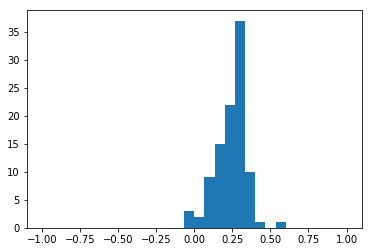

In [37]:
plt.hist(result_simu, range = (-1, 1), bins=30)